In [1]:
import pandas as pd
import numpy as np

In [2]:
r_data = pd.read_csv("shootings.csv")
r_data

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,3,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,4,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,5,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,8,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,9,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,5916,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,attack,Foot,True,Electrical devices
4891,5925,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,attack,Car,False,Guns
4892,5918,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,other,Not fleeing,False,Unarmed
4893,5921,William Slyter,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,other,Other,False,Guns


In [3]:
f_data = r_data.drop(["id"], axis=1)
f_data.head()

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera,arms_category
0,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,attack,Not fleeing,False,Guns
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,attack,Not fleeing,False,Guns
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,other,Not fleeing,False,Unarmed
3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,attack,Not fleeing,False,Other unusual objects
4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,attack,Not fleeing,False,Piercing objects


In [4]:
def missing_data(df):
    mis_val =df.isnull().sum()
    mis_val_percent = (100 * mis_val)/len(df)
    
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis = 1)
    rename_table = mis_val_table.rename(columns = {0 : "Missing Value", 1: "% of total values"})
    rename_table = rename_table[rename_table.iloc[:,1] != 0].sort_values("% of total values", ascending= False).round(1)
    
    print("Your selectect dataframe has " + str(df.shape[1]) + " Columns. \n "
         " There are " + str(rename_table.shape[0]) + " Columns that have missing values.")
    return rename_table

In [5]:
missing_data(f_data)

Your selectect dataframe has 14 Columns. 
  There are 0 Columns that have missing values.


,Missing Value,% of total values


In [6]:
f_data["name"].value_counts(sort=True, ascending=True)
f_data["date"].value_counts(sort=True, ascending=True)
f_data["manner_of_death"].value_counts(sort=True, ascending=True)
f_data["armed"].value_counts(sort=True, ascending=True)
f_data["age"].value_counts(sort=True, ascending=True)
f_data["gender"].value_counts(sort=True, ascending=True)
f_data["race"].value_counts(sort=True, ascending=True)
f_data["city"].value_counts(sort=True, ascending=True)
f_data["state"].value_counts(sort=True, ascending=True)
f_data["signs_of_mental_illness"].value_counts(sort=True, ascending=True)
f_data["flee"].value_counts(sort=True, ascending=True)
f_data["body_camera"].value_counts(sort=True, ascending=True)
f_data["arms_category"].value_counts(sort=True, ascending=True)

Hand tools                  1
Explosives                  4
Electrical devices         24
Piercing objects           29
Multiple                   54
Vehicles                  121
Blunt instruments         122
Other unusual objects     192
Unarmed                   348
Unknown                   418
Sharp objects             818
Guns                     2764
Name: arms_category, dtype: int64

In [7]:
import datetime
f_data["date"] =pd.to_datetime(f_data["date"]) 
f_data["year"] = pd.to_datetime(f_data["date"]).dt.year
f_data["month"] = pd.to_datetime(f_data["date"]).dt.month
f_data["month_name"] =f_data["date"].dt.strftime("%B")
f_data["month_num"] = f_data["date"].dt.strftime("%m")
f_data["weekday"] = f_data["date"].dt.strftime("%A")
f_data["day_num"] = f_data["date"].dt.strftime("%d").astype(int)
f_data['date_categ']=np.where(f_data['day_num']<16,"First Half","Second Half")
f_data['date_mon']=f_data.date.dt.to_period("M")

bins= [-1,18,30,40,55,65,110]
labels = ['Under 18','18-30','31-40','41-55','56-65', 'Above 65']
f_data['age_range'] = pd.cut(f_data['age'], bins=bins, labels=labels, right=False)

f_data

,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,...,arms_category,year,month,month_name,month_num,weekday,day_num,date_categ,date_mon,age_range
0,Tim Elliot,2015-01-02,shot,gun,53.0,M,Asian,Shelton,WA,True,...,Guns,2015,1,January,01,Friday,2,First Half,2015-01,41-55
1,Lewis Lee Lembke,2015-01-02,shot,gun,47.0,M,White,Aloha,OR,False,...,Guns,2015,1,January,01,Friday,2,First Half,2015-01,41-55
2,John Paul Quintero,2015-01-03,shot and Tasered,unarmed,23.0,M,Hispanic,Wichita,KS,False,...,Unarmed,2015,1,January,01,Saturday,3,First Half,2015-01,18-30
3,Matthew Hoffman,2015-01-04,shot,toy weapon,32.0,M,White,San Francisco,CA,True,...,Other unusual objects,2015,1,January,01,Sunday,4,First Half,2015-01,31-40
4,Michael Rodriguez,2015-01-04,shot,nail gun,39.0,M,Hispanic,Evans,CO,False,...,Piercing objects,2015,1,January,01,Sunday,4,First Half,2015-01,31-40
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4890,Rayshard Brooks,2020-06-12,shot,Taser,27.0,M,Black,Atlanta,GA,False,...,Electrical devices,2020,6,June,06,Friday,12,First Half,2020-06,18-30
4891,Caine Van Pelt,2020-06-12,shot,gun,23.0,M,Black,Crown Point,IN,False,...,Guns,2020,6,June,06,Friday,12,First Half,2020-06,18-30
4892,Hannah Fizer,2020-06-13,shot,unarmed,25.0,F,White,Sedalia,MO,False,...,Unarmed,2020,6,June,06,Saturday,13,First Half,2020-06,18-30
4893,William Slyter,2020-06-13,shot,gun,22.0,M,White,Kansas City,MO,False,...,Guns,2020,6,June,06,Saturday,13,First Half,2020-06,18-30


## No of Death Monthwise

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

In [9]:
#df_date_wise = f_data[f_data["armed"]=="gun"]
df = f_data.groupby("date_mon")["armed"].count().reset_index()
date_wise_death = df.sort_values("date_mon", ascending = False).head(20)
#date_wise_death

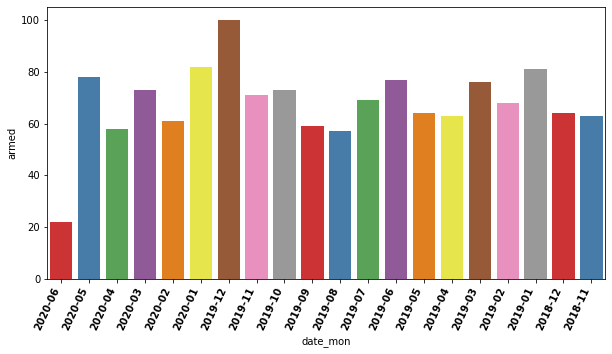

In [10]:
plt.figure(figsize = (10,5))
chart = sns.barplot( data = date_wise_death, x = "date_mon", y = "armed", palette = "Set1" )
chart = chart.set_xticklabels( chart.get_xticklabels(), rotation=65, horizontalalignment = "right", fontweight = "bold")


## No of Death Racewise

In [11]:
#f_data["tot_gender"] = 0
df_race_wise = f_data.groupby(["race","gender"]).size().unstack(level=1)
df_race_wise


gender,F,M
race,,
Asian,4,89
Black,47,1251
Hispanic,26,876
Native,5,73
Other,4,44
White,136,2340


Text(0, 0.5, 'No of Deaths')

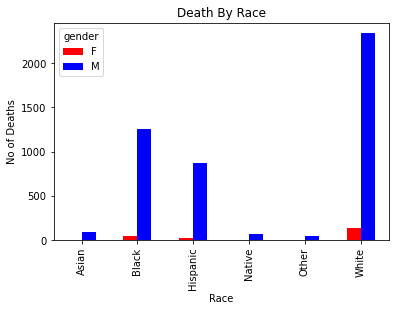

In [12]:
df_race_wise.plot(kind="bar",color =["r","b"])
plt.title("Death By Race")
plt.xlabel("Race")
plt.ylabel("No of Deaths")

In [13]:
monthly_df = f_data["date"].groupby(f_data.date.dt.to_period("M")).agg("count").to_frame(name="count").reset_index()
monthly_df

,date,count
0,2015-01,75
1,2015-02,77
2,2015-03,91
3,2015-04,83
4,2015-05,69
...,...,...
61,2020-02,61
62,2020-03,73
63,2020-04,58
64,2020-05,78


## Age wise data

In [31]:
df_age_wise = f_data.groupby(["age_range","year"]).size().unstack(level = 1)
df_age_wise
# for key, value in df_age_wise:
#     print(key)
#     print(value)

year,2015,2016,2017,2018,2019,2020
age_range,,,,,,
Under 18,18,16,28,15,13,7
18-30,330,288,289,277,253,108
31-40,278,303,274,274,286,134
41-55,244,208,225,219,210,89
56-65,75,67,61,74,74,26
Above 65,20,22,29,29,22,10


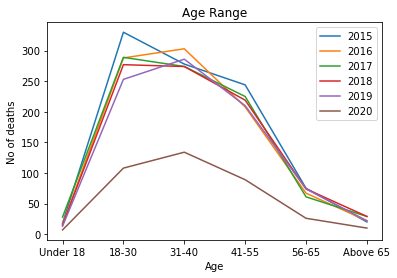

In [32]:
plt.plot(df_age_wise)
plt.title("Age Range")
plt.xlabel("Age")
plt.ylabel("No of deaths")
plt.legend(["2015","2016","2017","2018","2019","2020"])

## Cities wise Data

In [ ]:
f_data

In [ ]:
df_city_wise = f_data.groupby("city")["age"].mean().reset_index()
df_city_wise